In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
files = glob.glob('data-to-use/*.csv')

Pass in user file, return df for that user

In [4]:
def create_user_df(file):
    return pd.read_csv(file)

Method to return data from a given month in 2020. This is reliant on the df that is set in the above cell

In [5]:
def retrun_month_df(df,monthInt): 
    df_youtube_data_month = df[(df['years'] == 2020) & (df['months'] == monthInt) &(df['source'] == 'youtube') ]
    df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)
    df_youtube_data_month = df_youtube_data_month.sort_values(by='datetime',ascending =True).reset_index()
    #print("Dataframe Size for month #"+str(monthInt)+": "+str(df_youtube_data_month.shape[0]))
    return df_youtube_data_month

Method to return a list of the trails found in the passed in dataframe. 
A trail is currently considered a series of videos watched in a row, with no searches between, and at maximum 5 minutes spent between watching each video, ontop of the duration of the video

In [6]:
def create_trail_list(month_df):
    break_time_minutes = 5
    trails = []
    current_trail = []
    for index, row in month_df.iterrows():
        if row['action'] == "Searched":
            if len(current_trail) != 0:
                trails.append(current_trail)
            current_trail = [row]
        else:
            if len(current_trail) == 0:
                current_trail.append(row)
            else:
                eventTimeDif = (row.datetime - current_trail[-1].datetime).seconds
                if (pd.notnull(current_trail[-1].durations)):
                    difComp = int(current_trail[-1].durations) + (60*break_time_minutes)
                else:
                    difComp = (60*break_time_minutes)
                if (current_trail[-1]['action'] == "Searched" and eventTimeDif < (60 * break_time_minutes)) or (eventTimeDif < difComp):
                    current_trail.append(row)
                else:
                    if len(current_trail) != 0:
                        trails.append(current_trail)
                    current_trail = [row]   
    if len(current_trail) > 1:
        trails.append(current_trail)
    return trails

Print out some core details on the list of trails that are passed in

In [7]:
def create_month_report(trailsList):
    longest = 0
    count_five = 0
    count = 0
    total_length = 0
    trails_greater_then_five = generate_num_greater_five(jan_total_trails) 
    for trail in trailsList:
        if len(trail) > longest:
            longest = len(trail)
        if len(trail) > 19:
            count_five += 1
        if len(trail) > 1:
            count += 1
            total_length += len(trail)
    print("Number of Trails: "+ str(count))
    print("Number of Trails of Length Greater then 20: "+ str(count_five))
    print("Longest Trail: "+ str(longest))
    print("Average path length: "+str(total_length/count))

Generate a dictonary which contains the mean trail distance for that date

In [8]:
def generate_trail_means(trails):
    trailsByDate = {}
    meanByDate = {}
    for trail in trails:
        if trail[0]['datetime'].date() in list(trailsByDate.keys()):
            trailsByDate[trail[0]['datetime'].date()].append(trail)
        else:
            trailsByDate[trail[0]['datetime'].date()] = [trail]
    for date in list(trailsByDate.keys()):
        dateSum = 0
        for trail in trailsByDate[date]:
            dateSum = dateSum + len(trail)
        meanByDate[date] = dateSum/len(trailsByDate[date])
    return meanByDate

In [9]:
def generate_trail_count_per_day(trails):
    trailsByDate = {}
    meanByDate = {}
    for trail in trails:
        if trail[0]['datetime'].date() in list(trailsByDate.keys()):
            trailsByDate[trail[0]['datetime'].date()].append(trail)
        else:
            trailsByDate[trail[0]['datetime'].date()] = [trail]
    for i in trailsByDate.keys():
        trailsByDate[i] = len(trailsByDate[i])
    return trailsByDate

In [10]:
def generate_num_greater_five(trails):
    trailsByDate = {}
    numPerDate = {}
    for trail in trails:
        if trail[0]['datetime'].date() in list(trailsByDate.keys()) and len(trail) > 5:
            trailsByDate[trail[0]['datetime'].date()].append(trail)
        elif len(trail) > 5:
            trailsByDate[trail[0]['datetime'].date()] = [trail]
        else:
            pass
    for trailDate in trailsByDate.keys():
        numPerDate[trailDate] = len(trailsByDate[trailDate])
    return numPerDate

Plot the passed in dictonary, originally intended to use this to plot the mean trail

In [11]:
def plot_dic(dic,dic2): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.rcParams["figure.figsize"] = (20,10)
    plt.ylim(0,400)
    plt.plot(x, y)
    plt.plot
    
    plt.show()

In [12]:
def return_all_trails():
    total_trails = []
    for f in files:
        for i in range(1,6):
            user_df = create_user_df(f)
            df = retrun_month_df(user_df,i)
            trails = create_trail_list(df)
            total_trails += trails
    trailCounts = generate_trail_count_per_day(total_trails)
    return trailCounts

<ipython-input-5-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 1546
Number of Trails of Length Greater then 20: 10
Longest Trail: 28
Average path length: 3.276196636481242


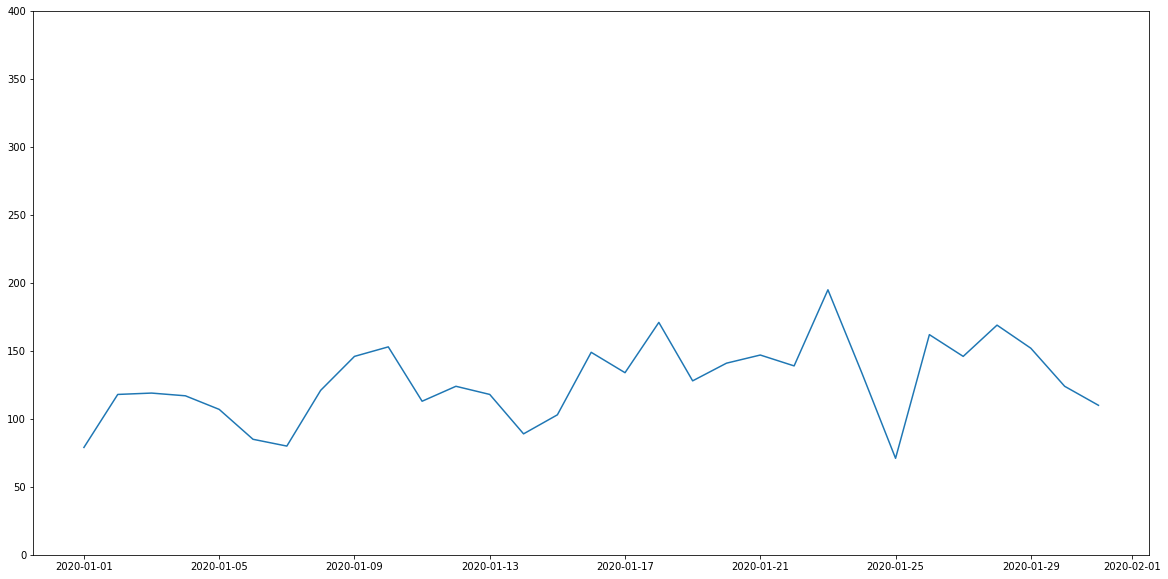

In [13]:
jan_total_trails = []
for f in files:
    user_df = create_user_df(f)
    jan_df = retrun_month_df(user_df,1)
    jan_trails = create_trail_list(jan_df)
    jan_total_trails += jan_trails
create_month_report(jan_total_trails)
trailCounts = generate_trail_count_per_day(jan_total_trails)
plot_dic(trailCounts)

<ipython-input-5-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 1617
Number of Trails of Length Greater then 20: 15
Longest Trail: 38
Average path length: 3.7662337662337664


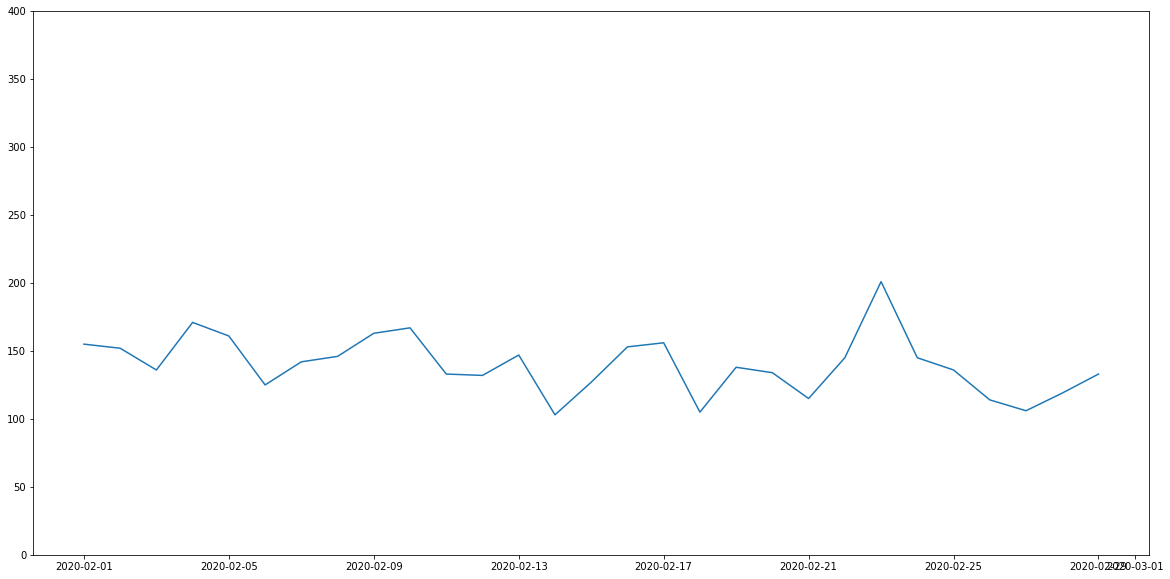

In [14]:
feb_total_trails = []
for f in files:
    user_df = create_user_df(f)
    feb_df = retrun_month_df(user_df,2)
    feb_trails = create_trail_list(feb_df)
    feb_total_trails += feb_trails
create_month_report(feb_total_trails)
trailCounts = generate_trail_count_per_day(feb_total_trails)
plot_dic(trailCounts)

<ipython-input-5-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 1911
Number of Trails of Length Greater then 20: 14
Longest Trail: 53
Average path length: 3.7995813710099426


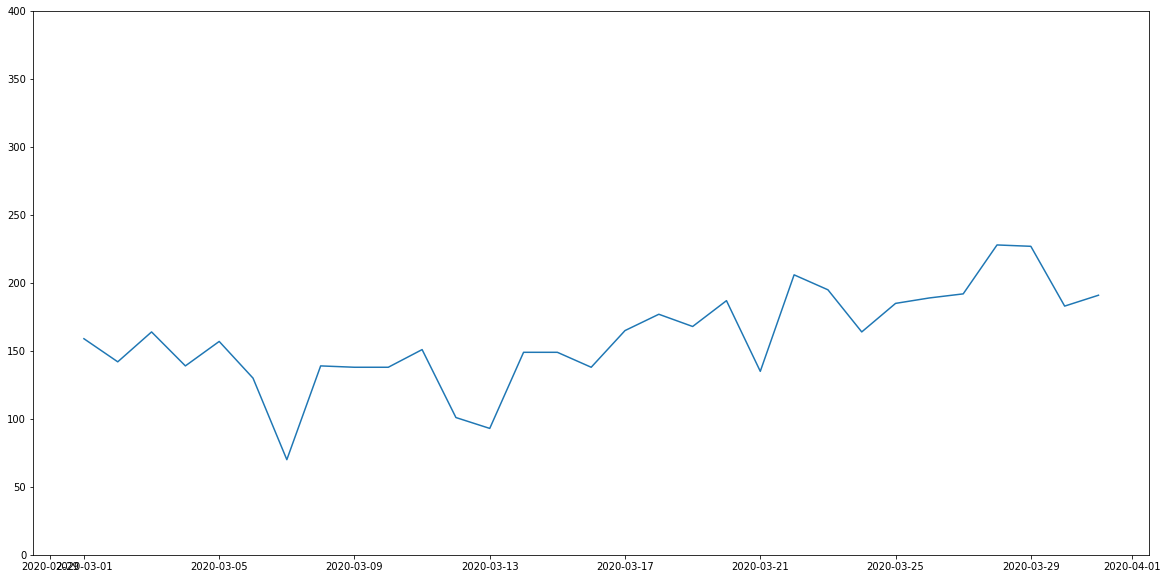

In [15]:
march_total_trails = []
for f in files:
    user_df = create_user_df(f)
    march_df = retrun_month_df(user_df,3)
    march_trails = create_trail_list(march_df)
    march_total_trails += march_trails
create_month_report(march_total_trails)
trailCounts = generate_trail_count_per_day(march_total_trails)
plot_dic(trailCounts)

<ipython-input-5-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 2700
Number of Trails of Length Greater then 20: 25
Longest Trail: 40
Average path length: 3.612962962962963


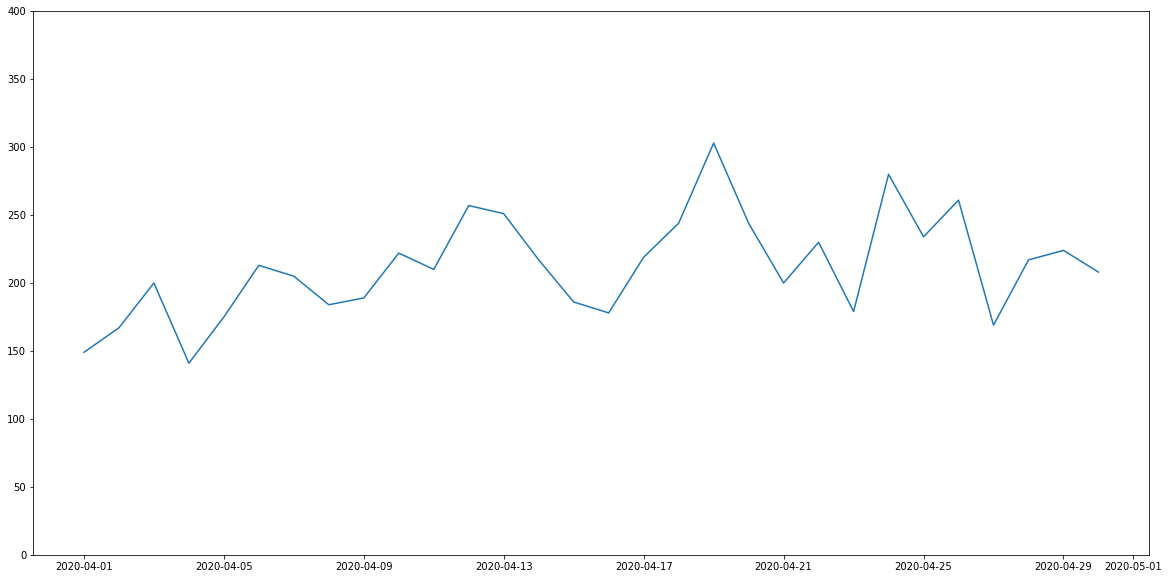

In [16]:
april_total_trails = []
for f in files:
    user_df = create_user_df(f)
    april_df = retrun_month_df(user_df,4)
    april_trails = create_trail_list(april_df)
    april_total_trails += april_trails
create_month_report(april_total_trails)
trailCounts = generate_trail_count_per_day(april_total_trails)
plot_dic(trailCounts)

<ipython-input-5-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


Number of Trails: 2688
Number of Trails of Length Greater then 20: 15
Longest Trail: 64
Average path length: 3.3843005952380953


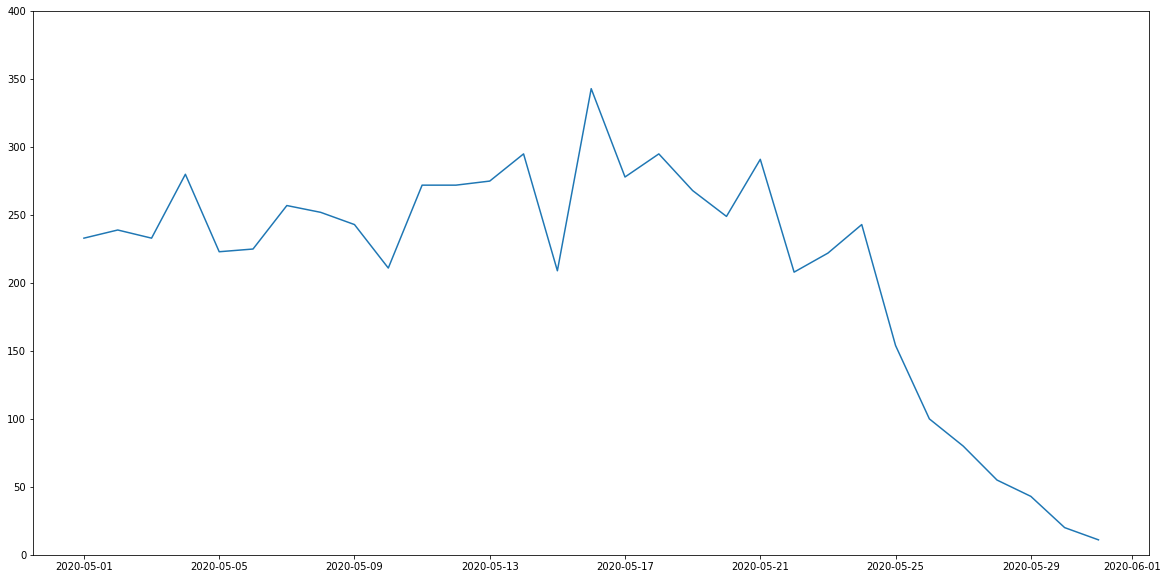

In [17]:
may_total_trails = []
for f in files:
    user_df = create_user_df(f)
    may_df = retrun_month_df(user_df,5)
    may_trails = create_trail_list(may_df)
    may_total_trails += may_trails
create_month_report(may_total_trails)
trailCounts = generate_trail_count_per_day(may_total_trails)
plot_dic(trailCounts)

<ipython-input-6-d50ab5ad5caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_data_month['datetime'] = pd.to_datetime(df_youtube_data_month.datetime)


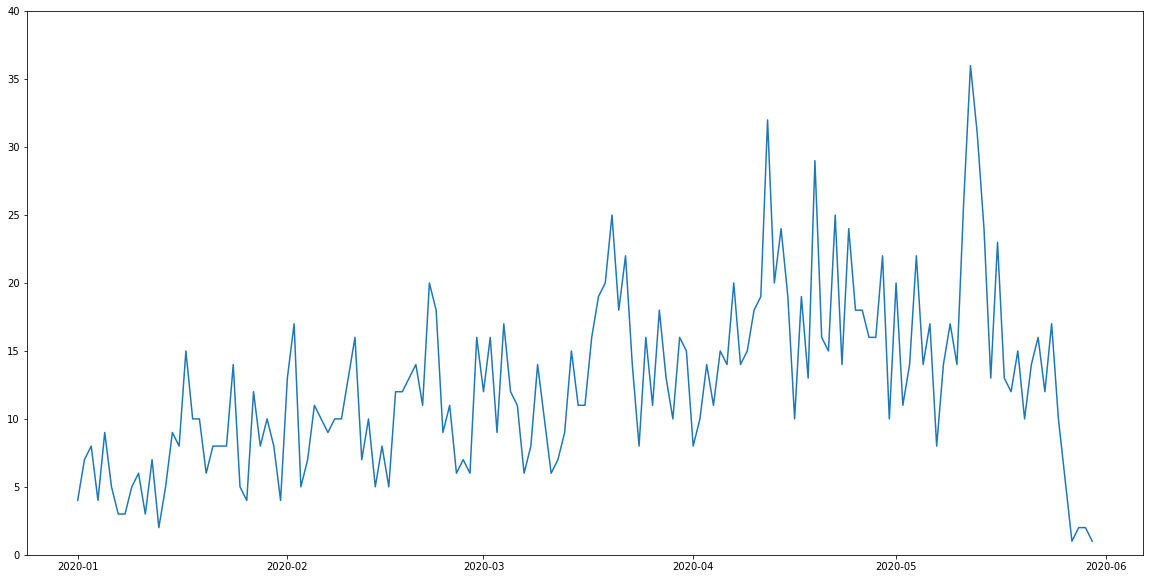

In [21]:
trails = return_all_trails()
plot_dic(trails)